In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec 
import matplotlib.patheffects as path_effects
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes
from hockey_rink import NHLRink

#%%

df = pd.read_csv("/Users/max/Downloads/Pick224-2022-09-16.csv")

teams = df.TEAM.unique().tolist()

new_teams = [x for x in teams if len(x) <= 3]

df['EV GF%Rel'] = df['EV GF%Rel'].str.replace(" ","")

df['EV GF%Rel'] = pd.to_numeric(df['EV GF%Rel'],errors='raise')

df.head()

,LEAGUE,NAME,DY+/-,PLAYER ID,POS,SEASON,GP,EV P1/GP,PP P1/GP,P1/GP,...,AGE DEC 31,#,TEAM,HT,SHOOTS,DRAFT YEAR,NHL DRAFT,DRAFT TEAM,NHL TEAM,HEATMAP
0,QMJHL,Mavrik Bourque,DY+2,45337/mavrik-bourque,F,2022,31,0.9355,0.7419,1.7097,...,20.98,22,SHA,5'11,R,2020,DAL (2020) - #30,DAL,DAL,NaN
1,QMJHL,Joshua Roy,DY+1,46666/joshua-roy,F,2022,66,0.9394,0.4697,1.4242,...,19.40,10,SHE,6'00,L,2021,MTL (2021) - #150,MTL,MTL,NaN
2,QMJHL,William Dufour,DY+2,45391/william-dufour,F,2022,66,0.9394,0.3939,1.3636,...,20.93,28,SNB,6'03,R,2020,NYI (2020) - #152,NYI,NYI,NaN
3,QMJHL,Zachary Bolduc,DY+1,46505/zachary-bolduc,F,2022,65,0.9846,0.3231,1.3385,...,19.85,15,QUE,6'01,L,2021,STL (2021) - #17,STL,STL,NaN
4,QMJHL,Xavier Simoneau,DY+3,44835/xavier-simoneau,F,2022,48,0.9167,0.3125,1.3333,...,21.62,81,CHA,5'07,L,2019,MTL (2021) - #191,MTL,MTL,NaN


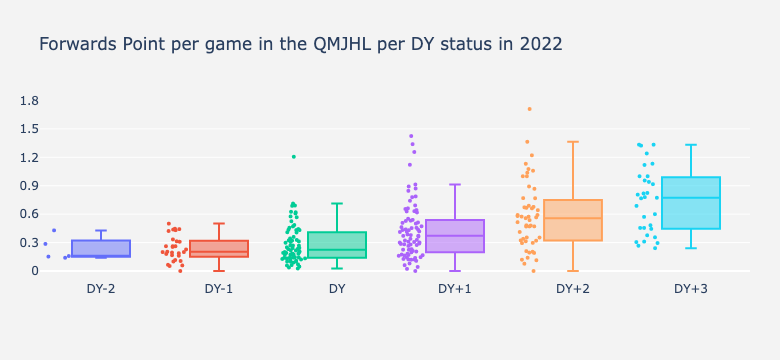

In [38]:
import plotly.graph_objects as go

fig = go.Figure()
for DY_value in ['DY-2', 'DY-1',"DY",'DY+1', 'DY+2', 'DY+3']:
    fig.add_trace(go.Box(y=df[(df["DY+/-"] == DY_value) & (df["POS"] == "F")]["P1/GP"],
                         quartilemethod="linear",
                         name=DY_value,
                         boxpoints='all',
                        jitter=0.5,
                         whiskerwidth=0.2,
                        marker_size=4,
                        hovertext=df[(df["DY+/-"] == DY_value) & (df["POS"] == "F")].NAME))

fig.update_layout(
    title='Forwards Point per game in the QMJHL per DY status in 2022',
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=.3,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
    showlegend=False
)



fig.show()

In [8]:
df["DY+/-"].unique().tolist()

['DY+2', 'DY+1', 'DY+3', 'DY', 'DY-1', 'DY-2']